In [1]:
import pandas as pd
import json
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_json('data.jsonl', lines = True)

In [3]:
len(data)

1300

In [4]:
data.loc[0, 130]

['В случае если слабость и жар не прекращаются, доктора советуют привязать ко лбу кусок ржаного хлеба с уксусом или кислым квасом.',
 1]

In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,691,692,693,694,695,696,697,698,699,700
0,[С 1768 года Россия ведёт войну против Османск...,[В середине января 1770 года корпус генерала Х...,"[Там русскую армию встретил враг, по жестокост...",[За зиму она унесла жизни нескольких тысяч сол...,[Вскоре эпидемия вспыхнула в близлежащей Польш...,"[Несмотря на то, что ещё весной бушующую в Мол...","[Распространение чумы продолжилось, и осенью о...",[В течение последующего года количество умерши...,"[О том, как изменилась Москва с начала эпидеми...",[Найти его уже невозможно – летом-осенью 1770 ...,...,None,None,None,None,None,None,None,None,None,None
1,[Роль одного из главных злодеев в южнокорейско...,"[Его персонаж Чан Док Су попал в игру, украв д...","[Он жесток, не боится убивать и предавать — эт...","[Хо Сон-тхэ — 43 года, он родился в октябре 19...","[По данным Today, будущий актёр изучал русский...","[Свободно владея языком, там он отвечал за про...",[На ток-шоу «Счастливы вместе» Сон-тхэ рассказ...,[Затем Сон-тхэ перешёл в крупную судостроитель...,[На этой работе его доход составлял 70 миллион...,[В 2011 году Сон-тхэ занял пятое место на шоу ...,...,None,None,None,None,None,None,None,None,None,None
2,[В СССР преуменьшали значение программы ленд-л...,[В Российском военно-историческом общества и с...,[На деле союзники оказывали Москве не только г...,"[Некоторые российские историки убеждены, что б...",[Американская и британская техника помогала об...,[А Иосиф Сталин в разговоре с британским премь...,[Больше половины всех грузов по ленд-лизу дост...,[Ещё об одном одном важном маршруте — авиатрас...,[11 марта 1941 года президент США Франклин Руз...,"[В Вашингтоне считали, что американская продук...",...,None,None,None,None,None,None,None,None,None,None
3,[В 1933 году в России началась третья в истори...,"[Мужчин, вступающих в однополые контакты, прир...","[Их подвергли репрессиям, публично обвиняя в р...",[Мужеложство было уголовно наказуемо на протяж...,"[За это время, по разным оценкам, осудили от 2...",[Среди них и известные люди – деятели культуры...,[Тем поразительнее на фоне антигомосексуальной...,[Приглашение поступило лично от высокопоставле...,[Трём представителям организации Homosexuelle ...,"[Их поселили в престижный отель «Метрополь», в...",...,None,None,None,None,None,None,None,None,None,None
4,[В январе 2021 года известный американский вед...,[За свою 63-летнюю карьеру Кинг взял тысячи ин...,[В разное время гостями его шоу были Барак Оба...,"[Его образ — подтяжки, очки и галстук — копиро...",[Ведущий начинал карьеру с разнорабочего на ра...,[Кинг прославился на американском телевидении ...,[Ларри Кинг определился с будущей профессией с...,[В подростковом возрасте ведущий часто ходил в...,[В 1942 году семья Ларри оказалась в тяжёлом ф...,[Матери мальчика пришлось содержать его и млад...,...,None,None,None,None,None,None,None,None,None,None


Сделаем так, чтобы каждый текст находился в одной ячейке:


In [6]:
data.columns

RangeIndex(start=0, stop=701, step=1)

In [7]:
data.loc[1, 1]

['Его персонаж Чан Док Су попал в игру, украв деньги у своих боссов и задолжав филиппинским бандитам.',
 0]

In [8]:
new_data = data.applymap(lambda x: x[0] if x is not None  else '')


In [9]:
new_data.loc[0, 0]


'С 1768 года Россия ведёт войну против Османской империи.'

In [10]:
new_data = new_data.apply(' '.join)

In [11]:
new_data.head() # каждый элемент датафрейма - текст, а не предложение 

0    С 1768 года Россия ведёт войну против Османско...
1    В середине января 1770 года корпус генерала Хр...
2    Там русскую армию встретил враг, по жестокости...
3    За зиму она унесла жизни нескольких тысяч солд...
4    Вскоре эпидемия вспыхнула в близлежащей Польше...
dtype: object

# Обработка текста
к сожалению, данные с файла неудобно расположены для дальнейшего использования, поэтому датасет необходимо изменить

In [12]:
data.loc[0,0]

['С 1768 года Россия ведёт войну против Османской империи.', 1]

In [13]:
Data = np.array(data.values.tolist())

<ipython-input-13-98a664e50a4b>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Data = np.array(data.values.tolist())


In [14]:
Data.shape

(1300, 701)

In [15]:
Data = Data.reshape(-1)
Data.shape

(911300,)

In [16]:
Data[0]

['С 1768 года Россия ведёт войну против Османской империи.', 1]

In [17]:
df = pd.DataFrame({'text': Data, 'target' : range(len(Data))})
df = df.dropna()

In [18]:
len(data) 

1300

In [19]:
df.head()

,text,target
0,[С 1768 года Россия ведёт войну против Османск...,0
1,[В середине января 1770 года корпус генерала Х...,1
2,"[Там русскую армию встретил враг, по жестокост...",2
3,[За зиму она унесла жизни нескольких тысяч сол...,3
4,[Вскоре эпидемия вспыхнула в близлежащей Польш...,4


In [20]:
def separat_class(s):
  return s['text'][1]
def separat_text(s):
  return s['text'][0]

In [21]:
df['target'] = df.apply(separat_class, axis = 1)
df['text'] = df.apply(separat_text, axis = 1)

In [22]:
df.head()

,text,target
0,С 1768 года Россия ведёт войну против Османско...,1
1,В середине января 1770 года корпус генерала Хр...,0
2,"Там русскую армию встретил враг, по жестокости...",0
3,За зиму она унесла жизни нескольких тысяч солдат.,0
4,Вскоре эпидемия вспыхнула в близлежащей Польше...,1


# Анализ данных, создание моделей

# Тематическое разбиение текста 

In [23]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('russian')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Будем использовать модель LDA (Латентное размещение Дирихле) для сегментации текста 

In [24]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
x_train, x_test, y_train, y_test = train_test_split(df.text, df.target, test_size=0.3, random_state=42) 
# разделим данные на тест и трейн

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import MaxAbsScaler

In [27]:
stop_words.extend('!')
stop_words.extend(',')
stop_words.extend('.')

Создадим vocabulary для дальнейшего создания матрицы частот 

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
tf_idf = TfidfVectorizer(stop_words=stop_words,
                             smooth_idf=False
                         )
tf_idf.fit(x_train)

TfidfVectorizer(smooth_idf=False,
                stop_words=['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с',
                            'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его',
                            'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы',
                            'по', 'только', 'ее', 'мне', ...])

In [30]:
idfs = tf_idf.idf_
idfs

array([ 7.94038176,  8.30249642, 12.30982961, ..., 12.30982961,
       12.30982961, 12.30982961])

In [31]:
 
lower_thresh = 3.
upper_thresh = 7.
not_often = idfs > lower_thresh
not_rare = idfs < upper_thresh
mask = not_often * not_rare
# Уберем те слова, что встречаются слишком часто(так как в таком случае они скорее всего не несут никакого смысла)
# и те слова, что встречаются слишком редко(так как они могут ничего не значить для тематики текста )
good_words = np.array(tf_idf.get_feature_names())[mask] 

In [34]:
import re

In [35]:
cleaned = []
for word in good_words:
    word = re.sub(r'[^\w\s]+|[\d]+', r'',word)
    
    if len(word) == 0:
        continue
    cleaned.append(word)
print("Оригинальное количество различных слов : %d\nПосле фильтрации: %d"%(idfs.shape[0], len(cleaned)))

Оригинальное количество различных слов : 129955
После фильтрации: 1438


In [36]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('russian')
cleaned = [stemmer.stem(x) for x in cleaned]


In [37]:
cleaned = set(cleaned)

In [38]:
cleaned

{'lego',
 'new',
 'of',
 'the',
 'times',
 'tj',
 'youtube',
 'абсолютн',
 'август',
 'автор',
 'адрес',
 'аз',
 'активн',
 'акц',
 'александр',
 'америк',
 'американск',
 'американц',
 'апрел',
 'арестова',
 'арм',
 'безопасн',
 'би',
 'бизнес',
 'благодар',
 'ближ',
 'бол',
 'болезн',
 'больниц',
 'больш',
 'большинств',
 'борьб',
 'брат',
 'буд',
 'будут',
 'будущ',
 'буквальн',
 'быва',
 'бывш',
 'быстр',
 'важн',
 'вариант',
 'ве',
 'век',
 'великобритан',
 'вернул',
 'вернут',
 'вероятн',
 'верс',
 'весн',
 'вест',
 'весьм',
 'вечер',
 'вещ',
 'взгляд',
 'взял',
 'взят',
 'вид',
 'виде',
 'видел',
 'видет',
 'видим',
 'виж',
 'включ',
 'вконтакт',
 'владимир',
 'власт',
 'влиян',
 'вмест',
 'вне',
 'вниман',
 'внов',
 'внутр',
 'вовс',
 'вод',
 'воен',
 'возл',
 'возможн',
 'возраст',
 'войн',
 'войск',
 'вокруг',
 'вообщ',
 'вопрос',
 'восем',
 'вперв',
 'вплот',
 'вполн',
 'впоследств',
 'врач',
 'врем',
 'времен',
 'врод',
 'все',
 'всем',
 'вскор',
 'вспомина',
 'встреч',
 'в

Для того, чтобы использовать модель LDA необходимо создать матрицу частот слов текста. Благо в sklearn есть для этого готовый класс CountVectorizer, который не требует отдельной леммитизации и токенизации текста 

In [54]:
vec = CountVectorizer( tokenizer=word_tokenize, stop_words = stop_words, vocabulary = cleaned) 
bow = vec.fit_transform(x_train) 
bow_test = vec.transform(x_test)

scaler = MaxAbsScaler()
bow = scaler.fit_transform(bow)
bow_test = scaler.transform(bow_test)

In [55]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [56]:
lda = LDA(n_components = 60, 
                 max_iter=30,
                 n_jobs=2,
                 learning_method='batch',
                 verbose=1)
lda.fit(bow)

iteration: 1 of max_iter: 30
iteration: 2 of max_iter: 30
iteration: 3 of max_iter: 30
iteration: 4 of max_iter: 30
iteration: 5 of max_iter: 30
iteration: 6 of max_iter: 30
iteration: 7 of max_iter: 30
iteration: 8 of max_iter: 30
iteration: 9 of max_iter: 30
iteration: 10 of max_iter: 30
iteration: 11 of max_iter: 30
iteration: 12 of max_iter: 30
iteration: 13 of max_iter: 30
iteration: 14 of max_iter: 30
iteration: 15 of max_iter: 30
iteration: 16 of max_iter: 30
iteration: 17 of max_iter: 30
iteration: 18 of max_iter: 30
iteration: 19 of max_iter: 30
iteration: 20 of max_iter: 30
iteration: 21 of max_iter: 30
iteration: 22 of max_iter: 30
iteration: 23 of max_iter: 30
iteration: 24 of max_iter: 30
iteration: 25 of max_iter: 30
iteration: 26 of max_iter: 30
iteration: 27 of max_iter: 30
iteration: 28 of max_iter: 30
iteration: 29 of max_iter: 30
iteration: 30 of max_iter: 30


LatentDirichletAllocation(max_iter=30, n_components=60, n_jobs=2, verbose=1)

Посмотрим какие ключевые слова выделит модель и на какие темы она разделит произвольный текст 

In [88]:

sample = new_data.loc[5]
#sample = re.split("\. |\.\.\. ", sample)
sample

'Несмотря на то, что ещё весной бушующую в Молдавии и Польше болезнь назвали чумой, киевские врачи диагностировали лишь гнилую горячку с пятнами (тиф) и не посчитали нужным вводить карантин. Свободно владея языком, там он отвечал за продажи телевизоров на российском рынке. А Иосиф Сталин в разговоре с британским премьером Уинстоном Черчиллем утверждал, что без США и Британии «мы бы проиграли». Среди них и известные люди – деятели культуры, политики, учёные и военные. Кинг прославился на американском телевидении уже когда ему было далеко за 50, а успеху предшествовали долгая работа, банкротство, проблемы со здоровьем, арест и восстановление репутации. Историю путешествия норвежских учёных рассказало издание The Atlantic. Любой примат, претендующий на звание человека, обязан иметь ряд признаков, без которых подобное превращение невозможно. Интересный факт о моем городке.Там есть выходцы с Восточного Тимора и мягко говоря,они не очень хорошо к нам относятся.Однажды в течение конфликта мое

In [89]:
topics  = vec.transform([sample])
topics = lda.transform(topics)

In [90]:
lda.components_

array([[0.01666667, 0.01666667, 0.01666667, ..., 0.01666667, 0.01666667,
        0.01666667],
       [0.01666667, 0.01666667, 0.01666667, ..., 0.01666667, 0.01666667,
        0.01666667],
       [0.01666667, 0.01666667, 0.01666667, ..., 0.01666667, 0.01666667,
        0.01666667],
       ...,
       [0.01666667, 0.01666667, 0.01666667, ..., 0.01666667, 0.01666667,
        0.01666667],
       [0.01666667, 0.01666667, 0.01666667, ..., 3.01666667, 0.01666667,
        0.01666667],
       [0.01666667, 0.01666667, 0.01666667, ..., 0.01666667, 0.01666667,
        0.01666667]])

In [91]:
topics

array([[1.13026762e-02, 7.05578997e-03, 5.64932021e-03, 1.43118742e-03,
        4.24913722e-03, 3.75980360e-02, 4.29404059e-03, 1.83782743e-02,
        3.47206758e-02, 1.14761503e-02, 4.47977234e-03, 1.65008398e-02,
        3.03555357e-02, 1.30527878e-02, 1.27374451e-02, 1.41194081e-02,
        8.55300668e-02, 7.11812883e-03, 1.83363912e-02, 1.54946085e-02,
        5.75371109e-03, 1.70137874e-02, 2.03707483e-02, 1.56092347e-02,
        4.89287111e-02, 1.41184778e-02, 5.67667914e-03, 2.26493644e-02,
        1.56092771e-02, 4.95986565e-02, 5.64932021e-03, 1.26986983e-02,
        7.05578997e-03, 1.12240091e-02, 2.25269573e-02, 3.20414252e-02,
        1.42991092e-03, 4.26544175e-03, 7.09818761e-03, 2.32006194e-02,
        5.66294251e-03, 2.71519239e-02, 1.57534394e-02, 8.55445091e-03,
        9.97602397e-03, 1.43745570e-03, 1.83406082e-02, 1.16679764e-02,
        2.39884565e-02, 3.54272949e-02, 1.26894054e-02, 4.98672785e-02,
        1.55645639e-02, 2.34411627e-05, 2.34787372e-02, 1.429910

In [92]:
n_topics = 3
n_keywords = 5

In [93]:
topics = np.squeeze(topics, axis=0)
topics_indices = topics.argsort()[-n_topics:][::-1]

In [94]:
topics_indices

array([16, 51, 29], dtype=int64)

In [95]:
top_topics_words_dists = []
for i in topics_indices:
  top_topics_words_dists.append(lda.components_[i]) # components - показывает как часто слово i участвовало в предложении j 

In [96]:
keywords = np.zeros(shape=(n_keywords*n_topics, lda.components_.shape[1]))

In [97]:
for i,topic in enumerate(top_topics_words_dists):  # Выделим ключевые слова для каждой темы
  n_keywords_indices = topic.argsort()[-n_keywords:][::-1]
  for k,j in enumerate(n_keywords_indices):
    keywords[i * n_keywords + k, j] = 1
keywords = vec.inverse_transform(keywords)
keywords = [keyword[0] if len(keyword)!= 0 else 0 for keyword in keywords]

In [98]:
for topic in range(n_topics):
    print('topic ' + str(topic)  + ': ', end = ' ' )
    for key in keywords[topic * n_keywords:n_keywords*(topic  + 1)]:
        print(key, end = ' ')
    print(' ')

topic 0:  лет имел мог век номер  
topic 1:  проект tj жертв пол союз  
topic 2:  месяц times the готов курс  


Таким образом алгоритм разделил текст на 3 темы с определенными ключевыми словами

Видно, что тут присутствуют слова с иностранными символами(чтобы это избежать необходимо изменить токенизатор, но к сожалению у меня не хватило на все времени)

# Кластеринг


Хотя это не является фактически решением поставленной задачи, но посмотреть наглядно на то, как алгоритм разделяет тематически тексты не помешает 

In [109]:
from nltk.tokenize import TweetTokenizer

In [117]:
def tokenize_and_stem(text):

    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []

    for token in tokens:
        if re.search('[а-яА-Я]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [118]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words=stop_words,
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))
tfidf_matrix = tfidf_vectorizer.fit_transform(new_data)

print(tfidf_matrix.shape)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['бол', 'больш', 'будт', 'быт', 'вед', 'впроч', 'всег', 'всегд', 'даж', 'друг', 'е', 'ег', 'ем', 'есл', 'ест', 'ещ', 'зач', 'зде', 'ил', 'иногд', 'когд', 'конечн', 'куд', 'лучш', 'межд', 'мен', 'мног', 'мо', 'можн', 'нег', 'нельз', 'нибуд', 'никогд', 'нич', 'опя', 'посл', 'пот', 'почт', 'разв', 'сво', 'себ', 'совс', 'теб', 'тепер', 'тог', 'тогд', 'тож', 'тольк', 'хорош', 'хот', 'чег', 'чут', 'эт'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


(701, 683)


In [119]:
terms = np.array(tfidf_vectorizer.get_feature_names())
terms

array(['август', 'автор', 'актер', 'активн', 'александр', 'америк',
       'американск', 'американц', 'апрел', 'арм', 'безопасн', 'бел',
       'бизнес', 'благодар', 'близк', 'бо', 'бол', 'болезн', 'больниц',
       'больш', 'большинств', 'борьб', 'брат', 'буд', 'будут', 'будущ',
       'быва', 'бывш', 'быстр', 'быт', 'важн', 'ваш', 'ве', 'вед', 'век',
       'велик', 'вер', 'вернул', 'вернут', 'верс', 'вечер', 'вещ',
       'взгляд', 'взял', 'взят', 'вид', 'видел', 'вин', 'власт', 'вмест',
       'вниман', 'внутр', 'вод', 'воен', 'возможн', 'возраст', 'войн',
       'войск', 'вокруг', 'вообщ', 'вопрос', 'вперв', 'враг', 'врач',
       'врем', 'времен', 'врод', 'всег', 'всегд', 'всем', 'вспомина',
       'встрет', 'встреч', 'встреча', 'вступ', 'вступ рассказа',
       'вступ рассказа эт', 'втор', 'выбор', 'вызва', 'высок', 'выступа',
       'выход', 'вышл', 'герман', 'геро', 'глав', 'главн', 'глаз',
       'говор', 'год', 'голов', 'голос', 'город', 'государств',
       'государствен', 

In [120]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix) # Будем использовать Коэффициент Отиаи как метрику близлости двух текстов

In [123]:
# Используем метод ЛОктя бля нахождения оптимального количества кластеров
from sklearn.cluster import KMeans

In [125]:
import matplotlib.pyplot as plt

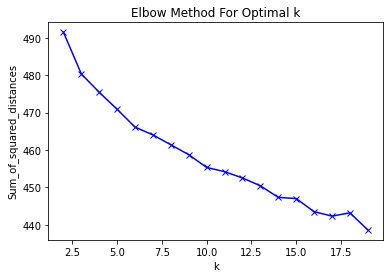

In [150]:
Sum_of_squared_distances = []
K = range(2,20)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(tfidf_matrix)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [151]:
# КАК видим график получился не очень примечательный, но отсюда можно выделить ТРИ потенциальных количества кластеров 
# k = 6, 14, 16

In [136]:
term_doc_matrix = vec.transform(new_data)
embeddings = lda.transform(term_doc_matrix) 

In [152]:
kmeans = KMeans(n_clusters=16)
clust_labels = kmeans.fit_predict(embeddings)
clust_centers = kmeans.cluster_centers_

In [153]:
 from sklearn.manifold import TSNE

In [154]:
embeddings_to_tsne = np.concatenate((embeddings,clust_centers), axis=0)

tSNE =  TSNE(n_components=2, perplexity=15)
tsne_embeddings = tSNE.fit_transform(embeddings_to_tsne)
tsne_embeddings, centroids_embeddings = np.split(tsne_embeddings, [len(clust_labels)], axis=0)

In [155]:
from matplotlib import cm

In [156]:
clust_indices = np.unique(clust_labels)

clusters = {clust_ind : [] for clust_ind in clust_indices}
for emb, label in zip(tsne_embeddings, clust_labels):
    clusters[label].append(emb)

for key in clusters.keys():
    clusters[key] = np.array(clusters[key])
colors = cm.rainbow(np.linspace(0, 1, len(clust_indices)))

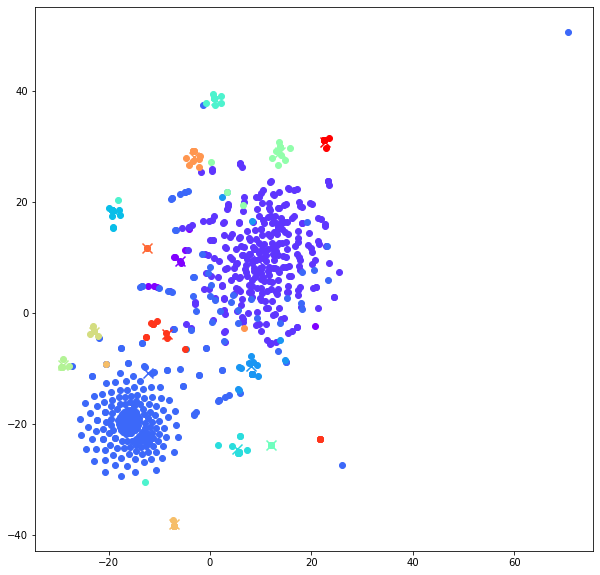

In [157]:
plt.figure(figsize=(10,10))
for ind, color in zip(clust_indices, colors):
    x = clusters[ind][:,0]
    y = clusters[ind][:,1]
    plt.scatter(x, y, color=color)
    
    centroid = centroids_embeddings[ind]
    plt.scatter(centroid[0],centroid[1], color=color, marker='x', s=100)

plt.show()

Как видим, модель неплохо разделяет тексты на 16 кластеров, хотя есть некоторые объекты сливающиеся с объектами другого класса, отсюда и появляются такие "странные" кластеры

# нахождение предложений являющимися началом абзаца, секции

Хотя главной задачей является разделение текста на блоки, схожими по тематике, можно попробовать искать предложения являющимися началом секции или абзаца. Очевидно, что такие предложения имеют конкретные предлоги, которые наталкивают нас на то, что они являются началом какого-то блока, таким образом можно выделить их отдельно от остальных 


В наборе данных у нас уже есть разметка таких данных, назовем из классы - всего их 3: 
1 — первое предложение абзаца

2 — первое предложение секции

0 — остальные предложения (части абзацев)

Нашей задачей является максимально различить два первых класса от последнего 

In [158]:
# Будем использовать простой  токенизатор, который не убирает пунктуацию и предлоги
vec = CountVectorizer(ngram_range=(1, 1), tokenizer=word_tokenize) 
bow = vec.fit_transform(x_train) 
bow_test = vec.transform(x_test)

scaler = MaxAbsScaler()
bow = scaler.fit_transform(bow)
bow_test = scaler.transform(bow_test)

In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [163]:
clf = LogisticRegression(max_iter=200, random_state=100)
clf.fit(bow, y_train)
pred = clf.predict(bow_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.72      0.85      0.78     23717
           1       0.43      0.30      0.35     10089
           2       0.24      0.02      0.04      1175

    accuracy                           0.66     34981
   macro avg       0.46      0.39      0.39     34981
weighted avg       0.62      0.66      0.63     34981



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [167]:
# Теперь попробуем использовать desiciontree
clf = DecisionTreeClassifier(max_depth = 12, random_state=100)
clf.fit(bow, y_train)
pred = clf.predict(bow_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.70      0.96      0.81     23717
           1       0.52      0.11      0.19     10089
           2       0.73      0.01      0.03      1175

    accuracy                           0.69     34981
   macro avg       0.65      0.36      0.34     34981
weighted avg       0.65      0.69      0.60     34981



Так как нас больше интересует recall(полнота), показывающая сколько объектов класса она захватила, то будем отталкиваться именно от нее,  а кокретно на показания recall для 1 и 2 класса 

КАК видим desiciontree более наточен на presicion(точность), в то время как Линейная регресия на полноту, поэтому будем использовать эту модель

Теперь посмотрим, что будет если менять униграммы нашего текста:


In [168]:
vec = CountVectorizer(ngram_range=(2, 2), tokenizer=word_tokenize) 
bow = vec.fit_transform(x_train) 
bow_test = vec.transform(x_test)

scaler = MaxAbsScaler()
bow = scaler.fit_transform(bow)
bow_test = scaler.transform(bow_test)

In [169]:
clf = LogisticRegression(max_iter=200, random_state=100)
clf.fit(bow, y_train)
pred = clf.predict(bow_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.70      0.93      0.80     23717
           1       0.48      0.16      0.24     10089
           2       0.71      0.02      0.04      1175

    accuracy                           0.68     34981
   macro avg       0.63      0.37      0.36     34981
weighted avg       0.64      0.68      0.62     34981



In [170]:
vec = CountVectorizer(ngram_range=(3, 3), tokenizer=word_tokenize) 
bow = vec.fit_transform(x_train) 
bow_test = vec.transform(x_test)

scaler = MaxAbsScaler()
bow = scaler.fit_transform(bow)
bow_test = scaler.transform(bow_test)

In [171]:
clf = LogisticRegression(max_iter=200, random_state=100)
clf.fit(bow, y_train)
pred = clf.predict(bow_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.68      0.99      0.81     23717
           1       0.56      0.04      0.08     10089
           2       1.00      0.01      0.01      1175

    accuracy                           0.68     34981
   macro avg       0.75      0.35      0.30     34981
weighted avg       0.66      0.68      0.57     34981



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Таким образом лучше всего показывает себя Линейная регрессия с униграмами размера 3 